In [1]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

In [2]:
def func(x):
    return np.exp(x[0] + 3 * x[1] - 0.1) +np.exp(x[0] - 3 * x[1] - 0.1) + np.exp(- x[0] - 0.1)

def dfunc(x):
    dfx1 = np.exp(x[0] + 3 * x[1] - 0.1) +np.exp(x[0] - 3 * x[1] - 0.1) - np.exp(- x[0] - 0.1)
    dfx2 = 3 * np.exp(x[0] + 3 * x[1] - 0.1) - 3 * np.exp(x[0] - 3 * x[1] -0.1)
    return  np.array([dfx1, dfx2])

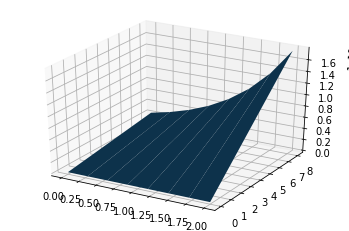

In [3]:
fig = pt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[2:0:08j,8:0:02j]
fmesh = func(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

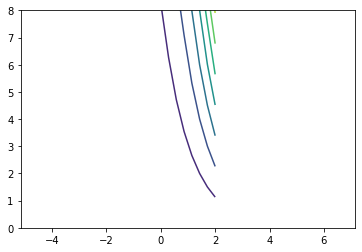

In [4]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh)

Next, initialize steepest descent with a starting guess:

In [5]:
guesses = [np.array([-1.3, 1.3])]


Next, run Steepest Descent:

In [6]:
x = guesses[-1]
s = -dfunc(x)

def f1d(alpha):
    return func(x + alpha*s)

alpha_opt = sopt.golden(f1d)
next_guess = x + alpha_opt * s
guesses.append(next_guess)

print(next_guess)

[-1.55595487  0.24549629]



Here's some plotting code to illustrate what just happened:

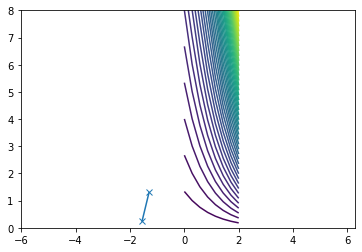

In [10]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "x-")